# Conversion Rate

Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so. The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don’t. This gives us a tremendous opportunity to understand what’s working well (and potentially scale it even further) and what’s not working well (and fix it).

The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.

This challenge is significantly easier than all others in this collection. There are no dates, no tables to join, no feature engineering required, and the problem is really straightforward. Therefore, it is a great starting point to get familiar with data science take-home challenges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('conversion_project.csv')

In [3]:
df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


- country : user country based on the IP address

- age : user age. Self-reported at sign-up step

- new_user : whether the user created the account during this session or had already an account and simply came back to the site

- source : marketing channel source
  Ads: came to the site by clicking on an advertisement
  Seo: came to the site by clicking on search results
  Direct: came to the site by directly typing the URL on the browser

- total_pages_visited: number of total pages visited during the session. This can be seen as a proxy for time spent on site and engagement

- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions

In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
# check missing data, no missing data

df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [6]:
# check converted rate, pretty low

df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [7]:
# countries, there are four countries

df.country.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [8]:
# check ages

df.age.unique()

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111])

In [9]:
# so I get rid of the 111 and 123, which are unrealistic

df = df[df.age < 100]

In [10]:
df.source.value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

## Visualization

In [11]:
df_country = df.groupby('country').size().reset_index(name = 'counts')

In [12]:
df_country['converted']= df.groupby('country')['converted'].mean().unique()

In [13]:
df_country

,country,counts,converted
0,China,76602,0.001332
1,Germany,13055,0.062428
2,UK,48449,0.052612
3,US,178092,0.037801


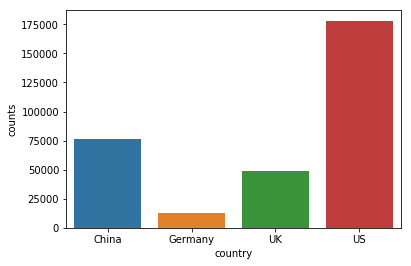

In [14]:
sns.barplot(x='country', y='counts', data=df_country)
#plt.tick_params(labelrotation=90)
plt.show()

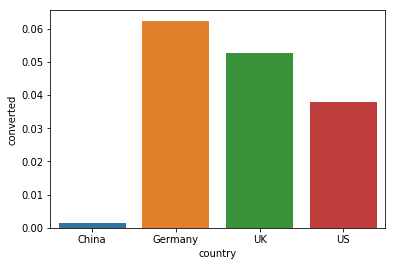

In [15]:
sns.barplot(x='country', y='converted', data=df_country)
plt.show()

In [16]:
df_source = df.groupby('source').size().reset_index(name = 'counts')

In [17]:
df_source['converted']= df.groupby('source')['converted'].mean().unique()
df_source

,source,counts,converted
0,Ads,88739,0.034472
1,Direct,72420,0.028169
2,Seo,155039,0.032888


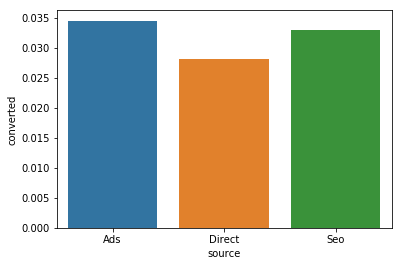

In [18]:
sns.barplot(x='source', y='converted', data=df_source)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import brier_score_loss

Using TensorFlow backend.


In [20]:
df_dummy = pd.get_dummies(df)

In [21]:
df_dummy

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
5,31,0,1,0,0,0,0,1,0,0,1
6,27,1,4,0,1,0,0,0,0,0,1
7,23,0,4,0,0,0,0,1,1,0,0
8,29,0,4,0,0,0,1,0,0,1,0
9,25,0,2,0,0,0,0,1,1,0,0


In [22]:
X = df_dummy.drop('converted',axis=1)
y = df_dummy.converted

In [23]:
features = list(X.columns)
features

['age',
 'new_user',
 'total_pages_visited',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'source_Ads',
 'source_Direct',
 'source_Seo']

In [24]:
y.value_counts()

0    306000
1     10198
Name: converted, dtype: int64

In [25]:
# Split to training and testing sets

X = X.as_matrix()
y = y.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [26]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([244847,   8111]))
(array([0, 1]), array([61153,  2087]))


### Logistic Regression

In [27]:
logreg =LogisticRegression(penalty='l2', solver='lbfgs')
#logreg = LogisticRegressionCV(Cs = np.logspace(-3,3,7),dual=False,scoring='roc_auc',max_iter=1000,n_jobs=-1,verbose=1)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7648456057007126
0.8513513513513513
0.6942980354575946
confusion matrix: 
 [[60900   253]
 [  638  1449]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61153
           1       0.85      0.69      0.76      2087

    accuracy                           0.99     63240
   macro avg       0.92      0.85      0.88     63240
weighted avg       0.99      0.99      0.99     63240



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [28]:
importances = abs(logreg.coef_[0])
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

country_China          3.802837
new_user               1.707570
source_Direct          1.706285
source_Seo             1.505281
source_Ads             1.486491
total_pages_visited    0.758074
country_US             0.642457
country_UK             0.247693
age                    0.075365
country_Germany        0.005070
dtype: float64

### Decision Tree

In [29]:
DT = DecisionTreeClassifier(min_samples_split=3,random_state=20)

DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)
fpr_dt, tpr_dt, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7250334672021419
0.8216019417475728
0.6487781504551988
[[60859   294]
 [  733  1354]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61153
           1       0.82      0.65      0.73      2087

    accuracy                           0.98     63240
   macro avg       0.90      0.82      0.86     63240
weighted avg       0.98      0.98      0.98     63240



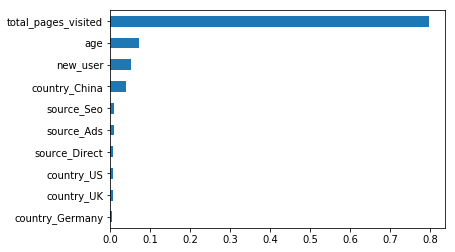

In [30]:
feat_importances = pd.Series(DT.feature_importances_,index=features)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [31]:
importances = DT.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.797030
age                    0.072726
new_user               0.051793
country_China          0.038293
source_Seo             0.008441
source_Ads             0.007968
source_Direct          0.006783
country_US             0.006660
country_UK             0.005667
country_Germany        0.004640
dtype: float64

### Random Forest

In [32]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=3,random_state=20,oob_score=True)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.688076122509664
0.9067398119122257
0.5543842836607571
[[61034   119]
 [  930  1157]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61153
           1       0.91      0.55      0.69      2087

    accuracy                           0.98     63240
   macro avg       0.95      0.78      0.84     63240
weighted avg       0.98      0.98      0.98     63240



In [33]:
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.823383
new_user               0.087189
country_China          0.047794
age                    0.028117
country_UK             0.005462
country_US             0.005187
country_Germany        0.002400
source_Direct          0.000368
source_Ads             0.000050
source_Seo             0.000049
dtype: float64

### XGBoost

In [34]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200)

xgb.fit(X_train,y_train)
y_pred =xgb.predict(X_test)
fpr_xgb, tpr_xgb, _= roc_curve(y_test, y_pred)

print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7634069400630914
0.8456610366919045
0.6957355055103018
confusion matrix: 
 [[60888   265]
 [  635  1452]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61153
           1       0.85      0.70      0.76      2087

    accuracy                           0.99     63240
   macro avg       0.92      0.85      0.88     63240
weighted avg       0.98      0.99      0.99     63240



In [35]:
importances = xgb.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.761491
new_user               0.099713
country_China          0.071688
age                    0.020411
country_US             0.015449
country_UK             0.010266
source_Ads             0.007469
source_Direct          0.006100
country_Germany        0.004687
source_Seo             0.002726
dtype: float32

### Try to balance the labeled data

but the results become worse!

In [36]:
# upsampling using training SMOTE generation
sm = SMOTE(random_state=20, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)
# outcome check
unique, counts = np.unique(y_train, return_counts=True)
print("balanced training data: ", unique, counts)

balanced training data:  [0 1] [244847 244847]


In [37]:
logreg =LogisticRegression(penalty='l2', solver='lbfgs')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5533687688550496
0.3951579811243332
0.9228557738380451
confusion matrix: 
 [[58205  2948]
 [  161  1926]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     61153
           1       0.40      0.92      0.55      2087

    accuracy                           0.95     63240
   macro avg       0.70      0.94      0.76     63240
weighted avg       0.98      0.95      0.96     63240



In [38]:
importances = abs(logreg.coef_[0])
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

country_China          11.033184
source_Direct           5.140432
country_US              4.952940
source_Ads              4.950672
country_UK              4.887070
source_Seo              4.676195
country_Germany         4.417405
new_user                2.491428
total_pages_visited     0.795286
age                     0.085983
dtype: float64

In [39]:
DT = DecisionTreeClassifier(min_samples_split=3,random_state=20)

DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)
fpr_dt, tpr_dt, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5425416083372219
0.40165822201750345
0.8356492573071395
[[58555  2598]
 [  343  1744]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     61153
           1       0.40      0.84      0.54      2087

    accuracy                           0.95     63240
   macro avg       0.70      0.90      0.76     63240
weighted avg       0.97      0.95      0.96     63240



In [40]:
importances = DT.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.826858
country_China          0.048970
age                    0.044189
new_user               0.039331
source_Ads             0.009030
source_Seo             0.007799
source_Direct          0.006310
country_US             0.006141
country_Germany        0.006095
country_UK             0.005278
dtype: float64

In [41]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=3,random_state=20,oob_score=True)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5065410779696494
0.3483894187511247
0.9276473406804024
[[57532  3621]
 [  151  1936]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61153
           1       0.35      0.93      0.51      2087

    accuracy                           0.94     63240
   macro avg       0.67      0.93      0.74     63240
weighted avg       0.98      0.94      0.95     63240



In [42]:
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.679411
new_user               0.167512
country_China          0.103676
age                    0.037915
country_US             0.005905
country_UK             0.003834
source_Direct          0.001465
country_Germany        0.000200
source_Seo             0.000070
source_Ads             0.000011
dtype: float64

In [43]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.01, n_estimators=200)

xgb.fit(X_train,y_train)
y_pred =xgb.predict(X_test)
fpr_xgb, tpr_xgb, _= roc_curve(y_test, y_pred)

print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5223358449946179
0.36314312441534147
0.9300431241015812
confusion matrix: 
 [[57749  3404]
 [  146  1941]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61153
           1       0.36      0.93      0.52      2087

    accuracy                           0.94     63240
   macro avg       0.68      0.94      0.75     63240
weighted avg       0.98      0.94      0.96     63240



In [44]:
importances = xgb.feature_importances_
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

total_pages_visited    0.766205
new_user               0.111298
country_China          0.079216
age                    0.013193
country_US             0.011302
source_Direct          0.008134
source_Ads             0.004704
country_UK             0.004357
source_Seo             0.001591
country_Germany        0.000000
dtype: float32

## Conclusions and next steps:


The site is working very well for young users. Definitely let’s tell marketing to advertise and use channels which are more likely to reach young people.

The site is working very well for Germany in terms of conversion. 

Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.

Maybe go through the UI and figure out why older users perform so poorly? From ~30 y/o conversion clearly starts dropping. A good actionable metric here is conversion rate for people >=30 yr old. Building a team whose goal is to increase that number would be interesting.

Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity.


### As you can see, product ideas usually end up being about:

Identify segments that perform well, but have low absolute count (like Germany). Then tell marketing to get more of those people

Tell product to fix the experience for the bad performing ones

Bad performing segments with high absolute count (like China) usually provide the biggest opportunities for massive gains, if you can guess why that’s happening and then build a test to validate your hypothesis